In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('estimator_comparison.csv')

In [3]:
df

,Unnamed: 0,Quality,UMI per cell,Replicate,Fraction,Cell number,Method,MI,Estimator,Target
0,0,Q0.001,8.166369,rep0,1.0,114072,VAE,0.349377,LMI,protein
1,1,Q0.001,8.166369,rep0,1.0,114072,VAE,0.225222,InfoNCE,protein
2,2,Q0.001,8.166369,rep0,1.0,114072,VAE,0.139080,MINE,protein
3,3,Q0.001,8.166369,rep0,1.0,114072,VAE,0.248143,LMI,celltype_coarse
4,4,Q0.001,8.166369,rep0,1.0,114072,VAE,0.255940,InfoNCE,celltype_coarse
...,...,...,...,...,...,...,...,...,...,...
85,85,Q1.000,8153.868320,rep0,1.0,114072,VAE,1.626199,InfoNCE,celltype_coarse
86,86,Q1.000,8153.868320,rep0,1.0,114072,VAE,1.472757,MINE,celltype_coarse
87,87,Q1.000,8153.868320,rep0,1.0,114072,VAE,3.678416,LMI,celltype_fine
88,88,Q1.000,8153.868320,rep0,1.0,114072,VAE,2.482866,InfoNCE,celltype_fine


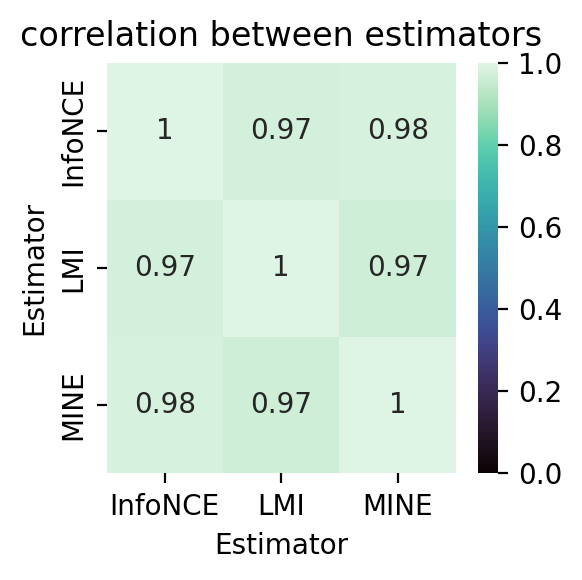

In [12]:
heat_df = df.pivot_table(
    index=['UMI per cell', 'Target'], 
    columns='Estimator', 
    values='MI'
)

# compute correlation matrix
corr = heat_df.corr()

# plot the heatmap!
plt.figure(figsize=(3, 3), dpi=200)
sns.heatmap(corr, annot=True, cmap='mako', vmin=0, vmax=1)
plt.title('correlation between estimators')
plt.tight_layout()
plt.show()

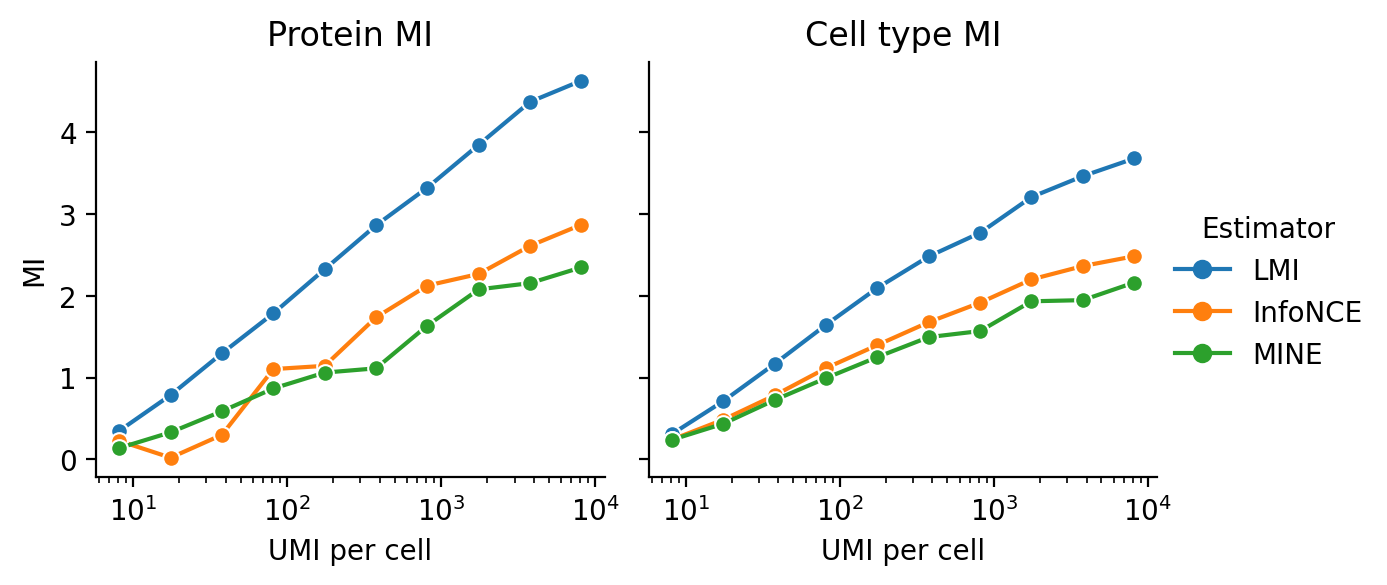

In [22]:
rcParams['figure.dpi'] = 200

g = sns.relplot(data=df[df['Target'] != 'celltype_coarse'], x='UMI per cell', y='MI', hue='Estimator', 
            marker='o', col='Target', kind='line', aspect=1, height=3)
g.axes[0, 0].set_title('Protein MI')
g.axes[0, 1].set_title('Cell type MI')
plt.xscale('log')